<a href="https://colab.research.google.com/github/NayoungShin/projectmanager/blob/main/9_19_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%9D%B4%ED%95%AD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [3]:
import tensorflow as tf


In [4]:
(x_train, y_train), (x_test, y_test) = \
    tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
from PIL import Image
Image.fromarray(x_train[0])  # 훈련용 이미지 0번을 그림으로 보기

In [6]:
y_train[0]  # 훈련용 이미지 0번의 숫자

5

In [8]:
import numpy as np
def filter_dataset(x, y, neg_cls, pos_cls):
    # x와 y에서 neg_cls와 pos_cls만 추려내는 함수
    m = (y == pos_cls) | (y == neg_cls)
    x = x[m]
    y = y[m]
    y = np.where(y == neg_cls, 0, 1)
    return x, y

x_train2, y_train2 = filter_dataset(x_train, y_train, 0, 1)

In [9]:
y_train2

array([0, 1, 1, ..., 1, 0, 1])

In [10]:
Image.fromarray(x_train2[1])

In [11]:
Image.fromarray(x_train2[0])

In [12]:
from tensorflow.keras.layers import *
model = tf.keras.Sequential([
    Flatten(),                        #이미지의 픽셀에 번호를 지정해서 일렬로 나열
    Dense(1, activation='sigmoid'),    #1은 이미지 하나를 의미, 이것이 100로 흡사하느냐, 70%흡사하느냐 30프로 흡사 하느냐 판단해줌
])

In [13]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
result = model.fit(x_train2, y_train2, validation_split=0.1, epochs=10)
#  validation_split은 0.1 즉 10프로는 모의고사, 에포크 10번 돌리기, 앞에서 부터 뒤까지 10번 반복해라.
#  에포크가 반복될수록 loss는 줄고, accaracy가 올라감.
# 에포크를 많이 돌린다고 정확도가 계속올라가는것이 아님.그래서 아래와같은 2가지 방법을 사용.
# Early Stopping: 100번을 하기로 했어도 성능이 떨어지기 시작하면 일찍 멈춤
# Checkpoint: 중간중간 저장을 해놨다가 제일 성능이 좋았던 시점을 다시 불러온다
# https://playground.tensorflow.org/

Epoch 1/10
357/357 [==============================] - 3s 4ms/step - loss: 1.3938 - accuracy: 0.9719 - val_loss: 0.0461 - val_accuracy: 0.9976
Epoch 2/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0984 - accuracy: 0.9974 - val_loss: 1.2501e-04 - val_accuracy: 1.0000
Epoch 3/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9975 - val_loss: 1.7261e-08 - val_accuracy: 1.0000
Epoch 4/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0583 - accuracy: 0.9984 - val_loss: 0.0312 - val_accuracy: 0.9992
Epoch 5/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0223 - accuracy: 0.9991 - val_loss: 0.0559 - val_accuracy: 0.9968
Epoch 6/10
357/357 [==============================] - 2s 5ms/step - loss: 0.0582 - accuracy: 0.9984 - val_loss: 0.0018 - val_accuracy: 0.9992
Epoch 7/10
357/357 [==============================] - 2s 5ms/step - loss: 0.0398 - accuracy: 0.9989 - val_loss: 0.0214 - val_accuracy: 0.999

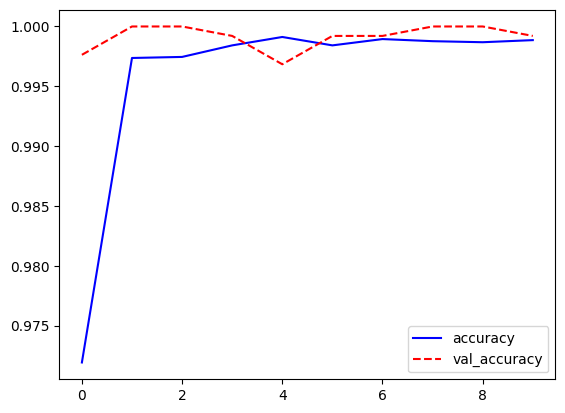

In [14]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], 'b-', label='accuracy')
plt.plot(result.history['val_accuracy'], 'r--', label='val_accuracy')
plt.legend()

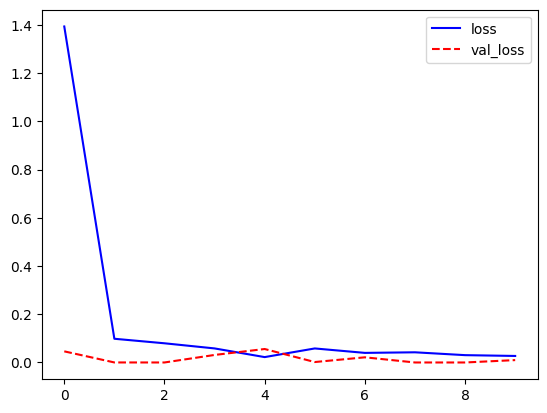

In [15]:
plt.plot(result.history['loss'], 'b-', label='loss')
plt.plot(result.history['val_loss'], 'r--', label='val_loss')
plt.legend()